In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [280]:
# Load the data file using pandas. 
data = pd.read_csv('LS_2.0_(2).csv')
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


In [281]:
#Replacing Nan as Not Available
data.replace({'Not Available': np.nan}, inplace=True)

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            1996 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [284]:
#Checking Null Valye
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              267
AGE                                          245
CATEGORY                                     245
EDUCATION                                    267
ASSETS                                       267
LIABILITIES                                  267
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [612]:
# Checking if  null values present. We need to exclude NOTA votes while checking it.

data = data[data['PARTY']!= 'NOTA']
data = data.dropna()
data.isnull().sum()

df = data.copy()

In [613]:
#Correcting the Names of Columns
df.rename(columns={'CRIMINAL\nCASES':'Criminal','GENERAL\nVOTES':'General Votes',
                   'POSTAL\nVOTES':'Postal Votes','TOTAL\nVOTES':'Total Votes',
                   'OVER TOTAL ELECTORS \nIN CONSTITUENCY':'OVER TOTAL ELECTORS IN CONSTITUENCY',
                   'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY':'OVER TOTAL VOTES POLLED IN CONSTITUENCY'},inplace=True)


In [614]:
#Converting the data type of the Criminal Case
df['Criminal']= df['Criminal'].astype(int)

In [615]:
#Cleaning LIABILITIES Numeric
df['LIABILITIES'] =  df['LIABILITIES'].str.replace('[Rs ,]','')
df[['LIABILITIES','LIABILITIES2']] = df['LIABILITIES'].str.split('\n', expand=True)
df = df.drop(columns=['LIABILITIES2'])


In [455]:
#Cleaning ASSETS Numeric
df['ASSETS'] =  df['ASSETS'].str.replace('[Rs ,]','')
df[['ASSETS','ASSETS2']] = df['ASSETS'].str.split('\n', expand=True)
df = df.drop(columns=['ASSETS2'])


In [616]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,Criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,General Votes,Postal Votes,Total Votes,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+",22251891,434199,1130,435329,22.466390,37.999125,1937690


Checking the values of the Columns

In [617]:
df['EDUCATION'].value_counts()

Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Illiterate                 5
Post Graduate\n            1
Name: EDUCATION, dtype: int64

In [618]:
# Removing the \n from 'Post Graduate\n'
df['EDUCATION'].replace(to_replace='Post Graduate\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

# 'Literate' = 8th Pass in our society
df['EDUCATION'].replace(to_replace='Literate', value='8th Pass', inplace=True)

# Any education level below 8th pass is illiterate
df['EDUCATION'].replace(to_replace='5th Pass', value='Illiterate', inplace=True)

In [622]:
df['EDUCATION'].value_counts()

Graduate         777
Post Graduate    503
12th Pass        256
10th Pass        196
8th Pass         108
Doctorate         73
Others            50
Illiterate        33
Name: EDUCATION, dtype: int64

In [623]:
df['GENDER'].value_counts()

MALE      1740
FEMALE     256
Name: GENDER, dtype: int64

In [624]:
df['CATEGORY'].value_counts()

GENERAL    1373
SC          380
ST          243
Name: CATEGORY, dtype: int64

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1996 entries, 0 to 2261
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   STATE                                    1996 non-null   object 
 1   CONSTITUENCY                             1996 non-null   object 
 2   NAME                                     1996 non-null   object 
 3   WINNER                                   1996 non-null   int64  
 4   PARTY                                    1996 non-null   object 
 5   SYMBOL                                   1996 non-null   object 
 6   GENDER                                   1996 non-null   object 
 7   Criminal                                 1996 non-null   object 
 8   AGE                                      1996 non-null   float64
 9   CATEGORY                                 1996 non-null   object 
 10  EDUCATION                                1996 no

In [625]:
df.describe()


,WINNER,Criminal,AGE,General Votes,Postal Votes,Total Votes,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,1996.000000,1996.000000,1996.000000,1.996000e+03,1996.000000,1.996000e+03,1996.000000,1996.000000,1.996000e+03
mean,0.270040,1.469940,52.347194,2.933312e+05,1112.224950,2.944434e+05,17.722496,25.991032,1.660797e+06
std,0.444091,7.677432,11.865419,2.549629e+05,1667.020546,2.559552e+05,14.904362,21.426221,3.174126e+05
min,0.000000,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,0.000000,44.000000,3.058475e+04,97.750000,3.077925e+04,1.950250,2.863868,1.530404e+06
50%,0.000000,0.000000,52.500000,2.918845e+05,470.000000,2.930290e+05,18.355852,28.176740,1.681608e+06
75%,1.000000,1.000000,61.000000,5.078095e+05,1549.500000,5.096195e+05,30.784835,44.517463,1.823664e+06
max,1.000000,240.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


# Educational Qualification Count Graph

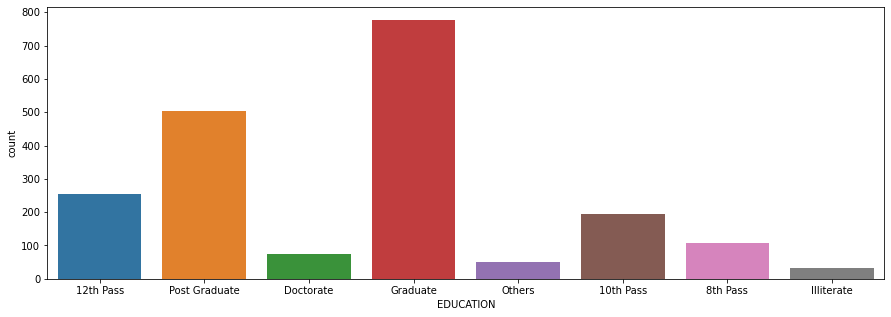

In [626]:
plt.figure(figsize=(15,5))
sns.countplot(x='EDUCATION',data=df);

# Criminal Candidate in Each State

<AxesSubplot:xlabel='Criminal', ylabel='STATE'>

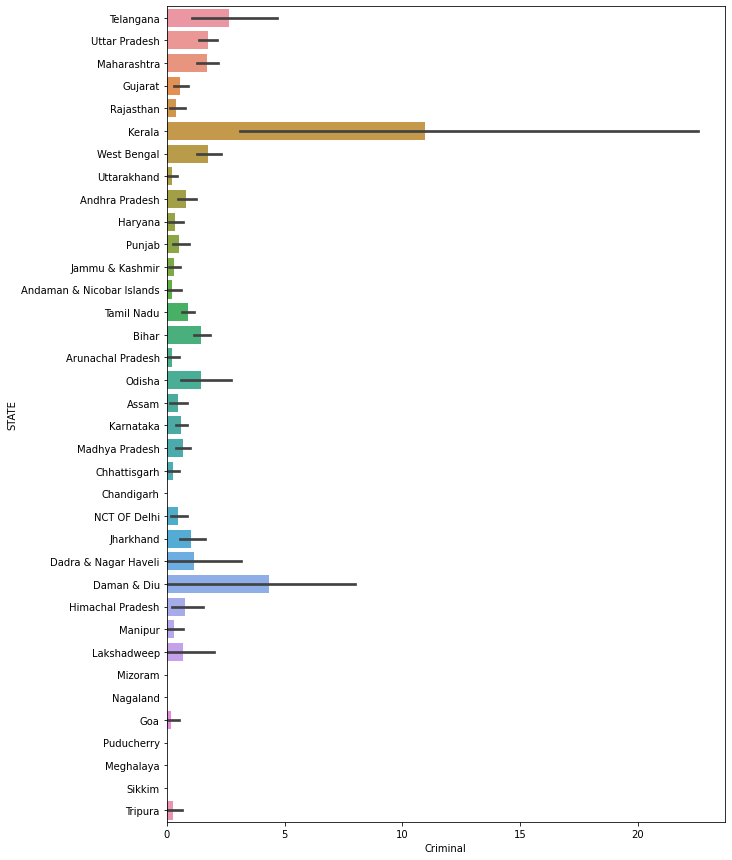

In [627]:
plt.figure(figsize=(10,15))
sns.barplot(x='Criminal',y='STATE',data=df,)

# Top 15 States - Candidate involved in Criminal case

In [708]:
state_criminal_case = df.groupby('STATE')[['Criminal']].sum().sort_values(by='Criminal',ascending = False).head(15)


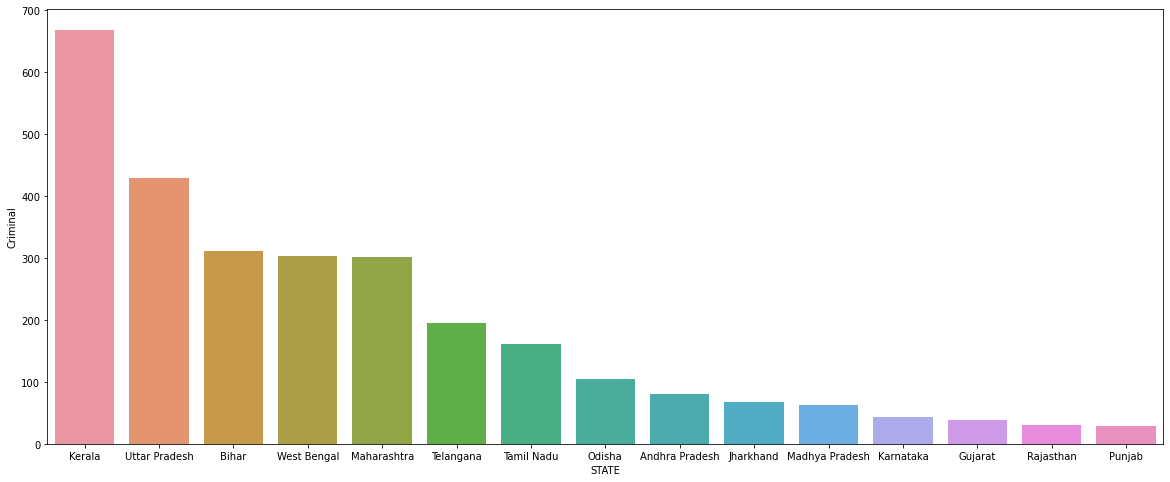

In [878]:
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = state_criminal_case.index , y = state_criminal_case['Criminal'] );

# Top 15 States - Winner Candidate Involved in Criminal Case

In [707]:
state_criminal_winner = df[df['WINNER']>0].groupby('STATE')[['Criminal']].sum().sort_values(by='Criminal',ascending = False).head(15)


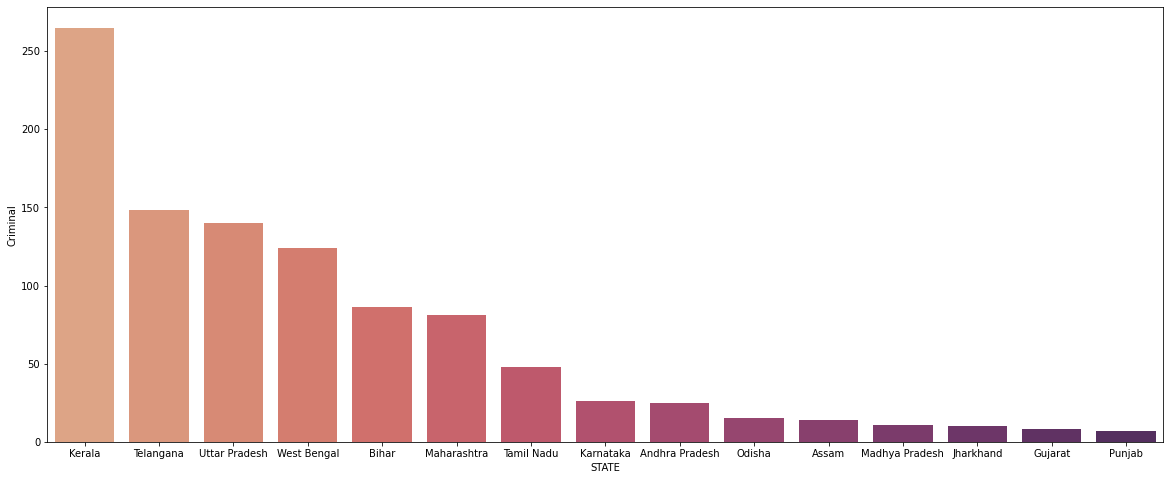

In [884]:
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = state_criminal_winner.index , y = state_criminal_winner['Criminal']  , palette='flare');

# Education vs Criminal Barplot

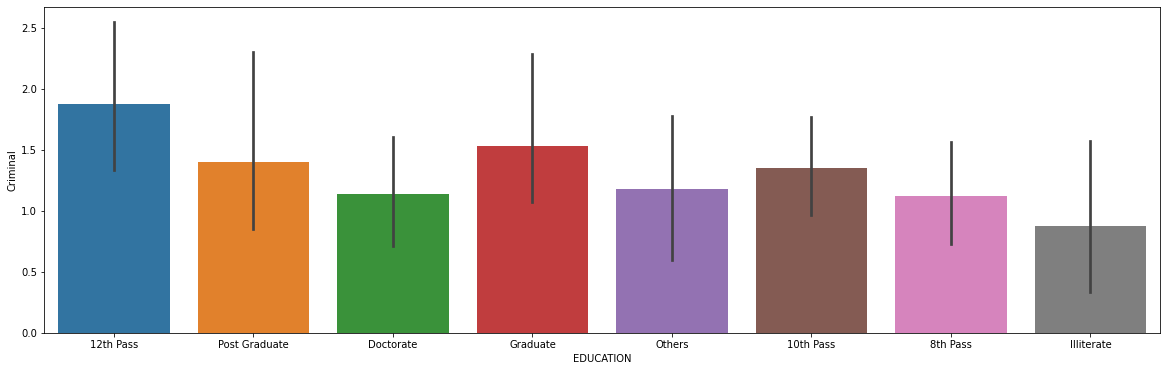

In [889]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x="EDUCATION", y="Criminal", data=df)

# GENDER CALCULATION

In [633]:
df['GENDER'].value_counts()

MALE      1740
FEMALE     256
Name: GENDER, dtype: int64

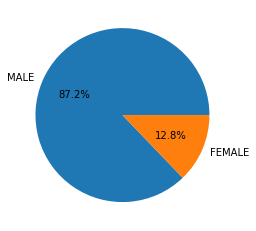

In [706]:
M=df['GENDER'].value_counts().MALE
F=df['GENDER'].value_counts().FEMALEGENDER = [M, F]
GENER_LABLE =['MALE', 'FEMALE']
plt.pie(GENDER, labels = GENER_LABLE, autopct='%1.1f%%')
plt.show() 

# Barplot of category Growth:

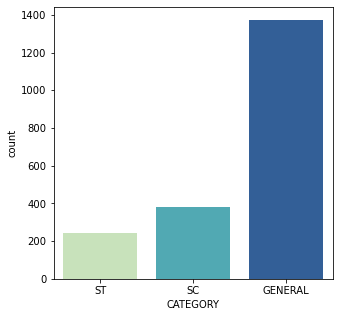

In [891]:
plt.figure(figsize=(5,5))
sns.countplot(x='CATEGORY',data=df,palette='YlGnBu');

# TOP 5 Party

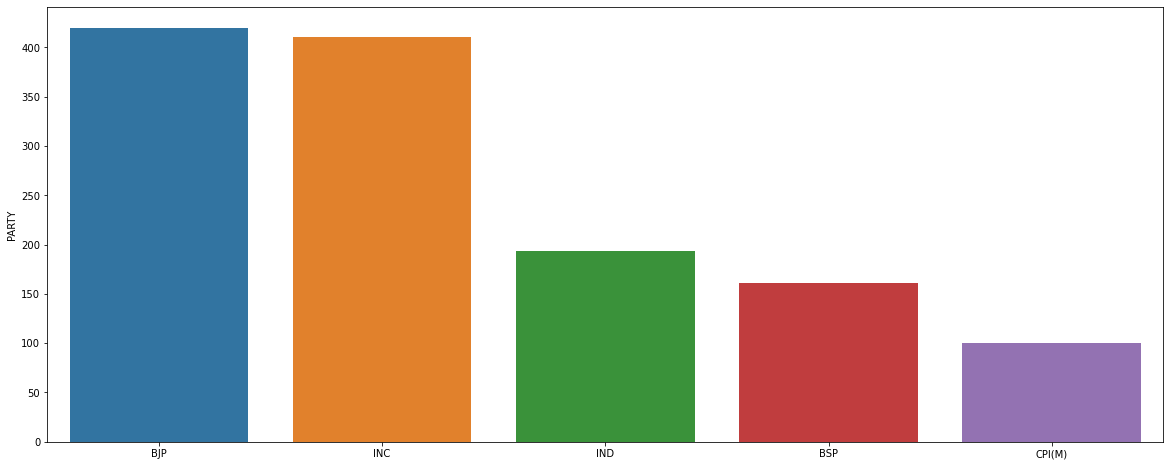

In [698]:
TopParty = df['PARTY'].value_counts().head(5)
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = TopParty.index , y = TopParty );


# Top 15 Party - Candidate involved in Criminal case


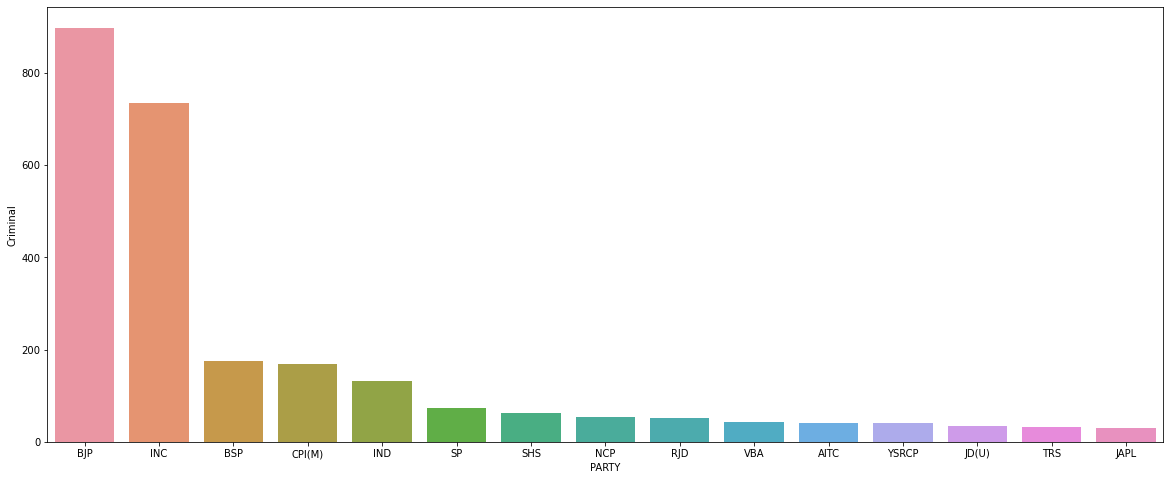

In [705]:
Part_criminal_case = df.groupby('PARTY')[['Criminal']].sum().sort_values(by='Criminal',ascending = False).head(15)
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = Part_criminal_case.index , y = Part_criminal_case['Criminal'] );

# Top 15 States - Winner Candidate Involved in Criminal Case

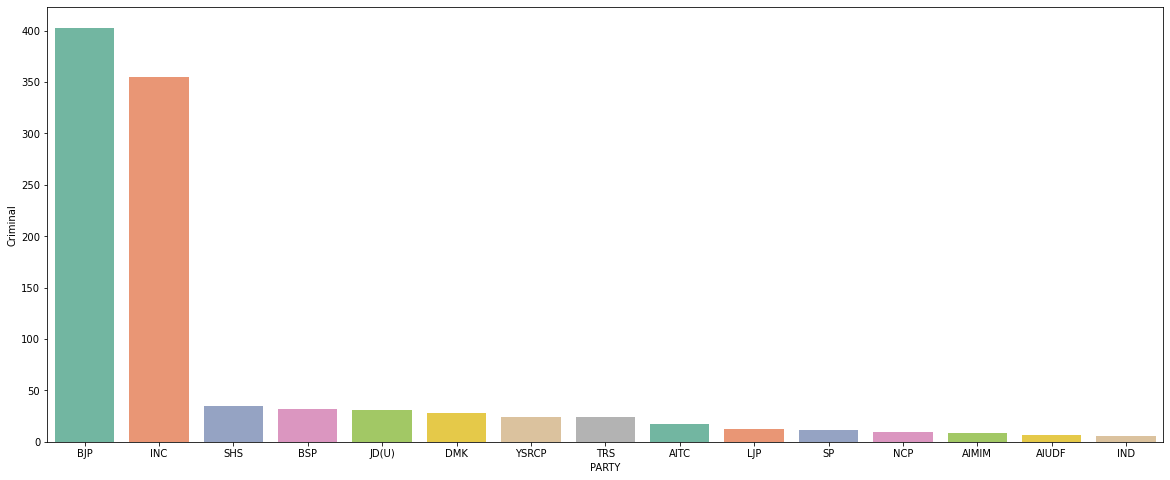

In [900]:
party_criminal_winner = df[df['WINNER']>0].groupby('PARTY')[['Criminal']].sum().sort_values(by='Criminal',ascending = False).head(15)
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = party_criminal_winner.index , y = party_criminal_winner['Criminal'], palette='Set2' );

# Criminal Age Group

In [724]:
Age_criminal_winner = df[df['Criminal']>0].groupby('AGE')[['Criminal']].sum().sort_values(by='Criminal',ascending = False).head(15)


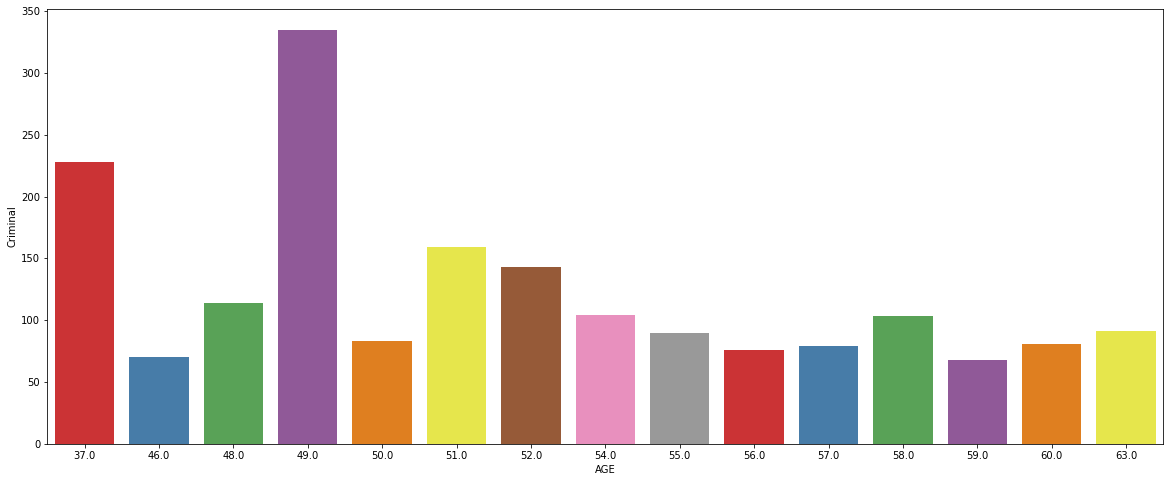

In [901]:
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = Age_criminal_winner.index , y = Age_criminal_winner['Criminal'], palette='Set1' );


# Top 15 States with Total Votes

In [735]:
Total_Voter = df[df['Total Votes']>0].groupby('STATE')[['Total Votes']].sum().sort_values(by=
                        ['Total Votes'], ascending= False).head(15)


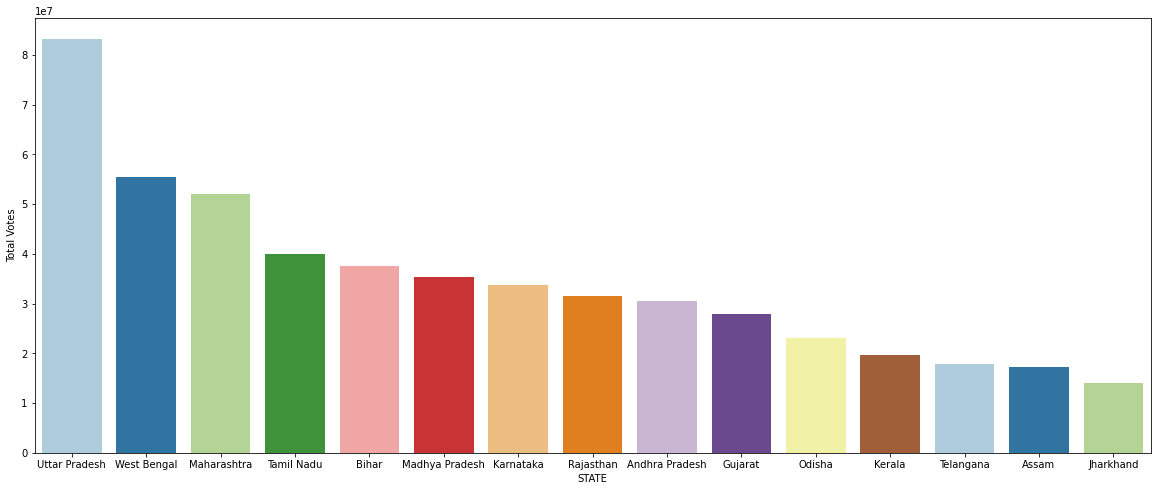

In [902]:
plt.subplots(1, figsize=(20, 8))
sns.barplot(x = Total_Voter.index , y = Total_Voter['Total Votes'],palette='Paired' );


# Correlation

In [737]:
correlation = df.corr()

<AxesSubplot:>

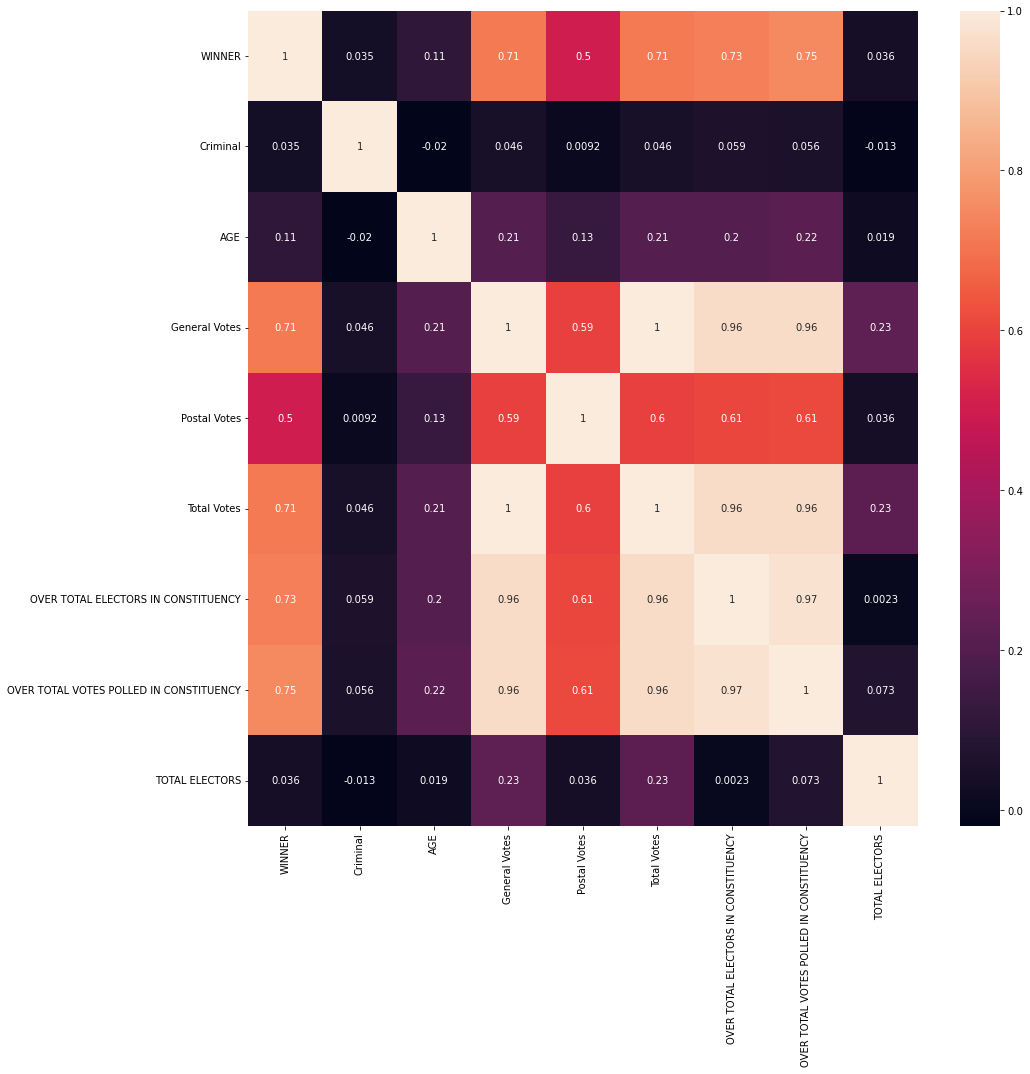

In [744]:
plt.subplots(1, figsize=(15, 15))
sns.heatmap(correlation, annot=True)

# State -  Party with maximum seats

In [775]:
State_Winner = df[df['WINNER']>0].groupby('STATE')[['PARTY']].max()

<AxesSubplot:xlabel='PARTY', ylabel='STATE'>

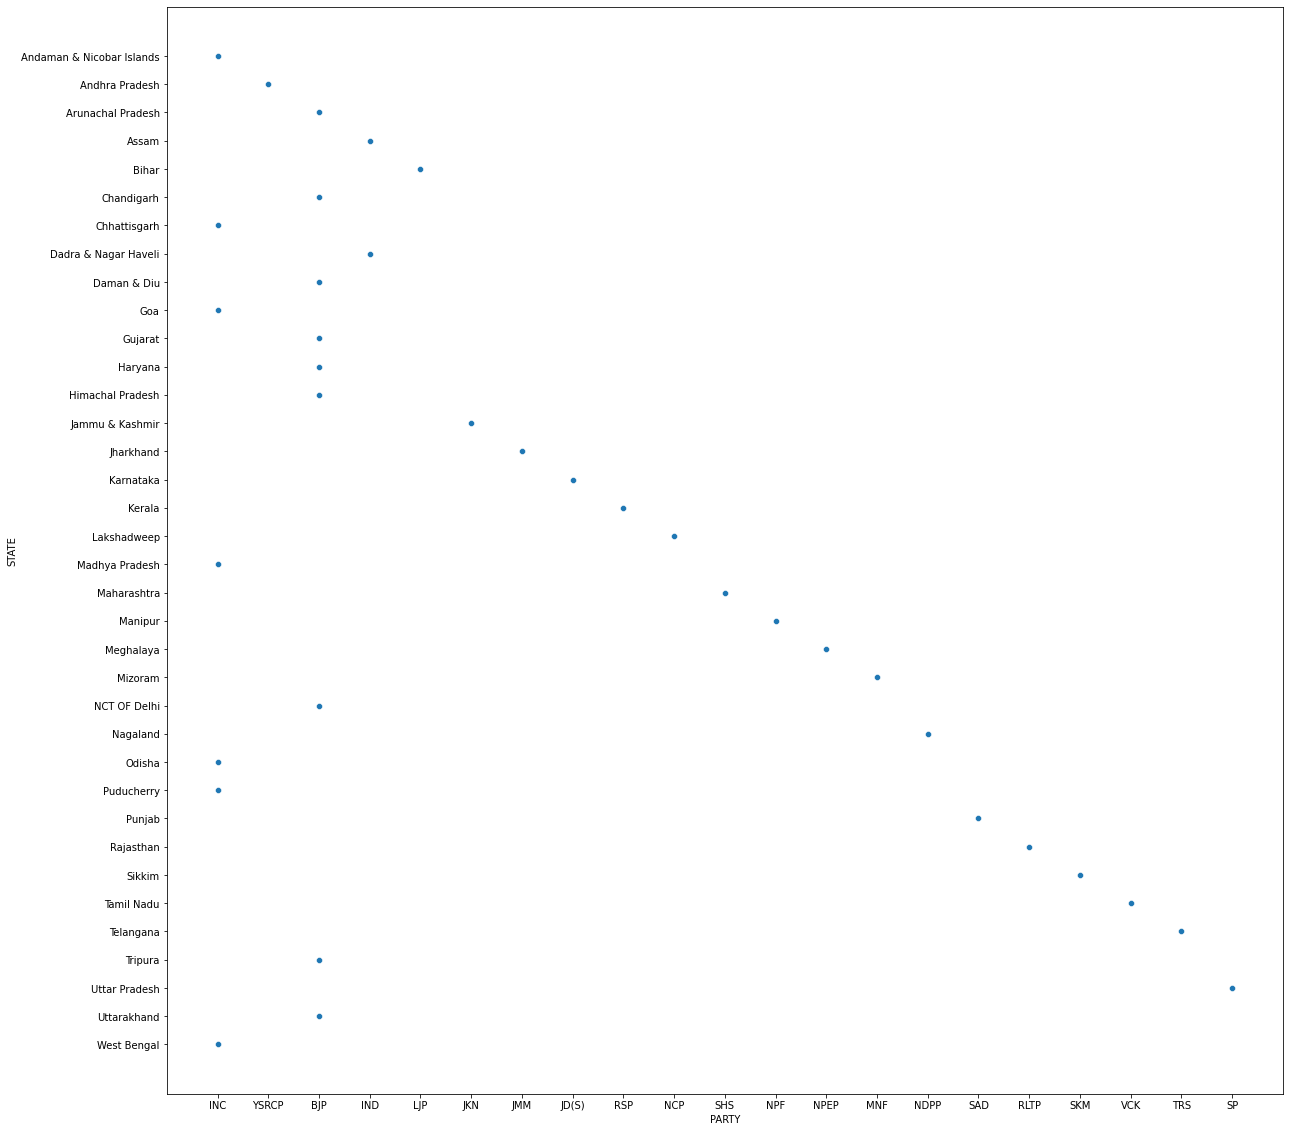

In [784]:
plt.subplots(1, figsize=(20, 20))
sns.scatterplot(x=State_Winner['PARTY'] ,y=State_Winner.index)

# Top 5 State with maximum Female Winner

In [876]:
Female_winners = df[(df['WINNER']==1) & (df['GENDER']=='FEMALE')]
Female_max = Female_winners.groupby('STATE').count()["WINNER"].sort_values(ascending=False).head(10)


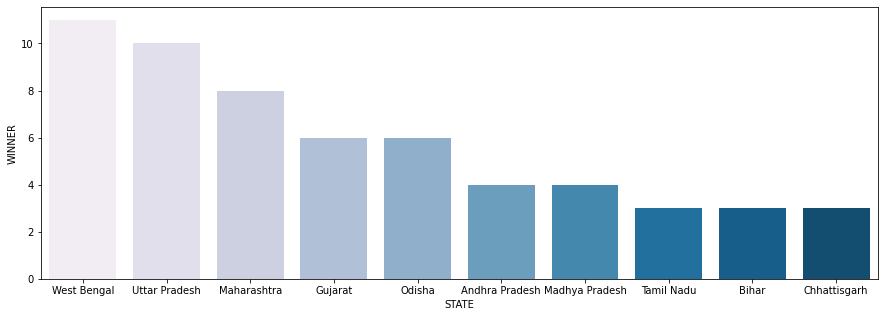

In [893]:
plt.subplots( figsize=(15, 5))
sns.barplot(x = Female_max.index , y = Female_max, palette='PuBu' );